# 911 Calls Exploratory Analysis
The database is a record of all records the emergency 911 calls over an interval of time. each call is recorded as an instance while recording features of each call. The features are broken down as follows:
These two features represent the location as identified by the Opearator
1.lat : String variable, Latitude

2.lng: String variable, Longitude

3.desc: String variable, Description of the Emergency Call, reason and nature of emergency

4.zip: String variable, Zipcode of the reporter as provided by the caller

5.title: String variable, Title

6.timeStamp: String variable, YYYY-MM-DD HH:MM:SS

7.twp: String variable, Township

8.addr: String variable, Address

9. e: String variable, Dummy variable (always 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.__version__

'1.23.3'

In [3]:
pd.__version__

'1.4.3'

In [4]:
sns.__version__

'0.11.2'

In [5]:
!pip install numpy==1.23.3

In [6]:
np.__version__

'1.23.3'

In [7]:
!pip install pandas==1.4.3 

In [8]:
cal=pd.read_csv('911.csv')
cal[:3]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [9]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
cal.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [11]:
#checn NaN in zip.
cal.zip.isna().sum()

12855

In [12]:
cal.zip.value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [13]:
# fill with mode z
z=cal.zip.mode()
z[0]

19401.0

In [14]:
cal.zip = cal.zip.fillna(z[0])
cal.zip

0        19525.0
1        19446.0
2        19401.0
3        19401.0
4        19401.0
          ...   
99487    19401.0
99488    19003.0
99489    19401.0
99490    19002.0
99491    19446.0
Name: zip, Length: 99492, dtype: float64

In [15]:
cal.zip.isna().sum()

0

In [16]:
cal.zip=cal.zip.astype('int')
cal.zip


0        19525
1        19446
2        19401
3        19401
4        19401
         ...  
99487    19401
99488    19003
99489    19401
99490    19002
99491    19446
Name: zip, Length: 99492, dtype: int32

In [17]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        99492 non-null  int32  
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 6.5+ MB


In [18]:
cal.e.astype('int')

0        1
1        1
2        1
3        1
4        1
        ..
99487    1
99488    1
99489    1
99490    1
99491    1
Name: e, Length: 99492, dtype: int32

# Basic Questions

In [19]:
#check columns
cal.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [20]:
#check unique zip
cal.zip.unique()

array([19525, 19446, 19401, 19044, 19426, 19438, 19462, 19428, 19040,
       19027, 18936, 18974, 19031, 19403, 19422, 19085, 18964, 19038,
       19406, 19468, 19010, 19095, 19464, 19444, 19041, 19440, 19405,
       19002, 19096, 19454, 19465, 19004, 19066, 19072, 18041, 19046,
       19090, 19012, 19025, 19473, 18073, 18969, 18074, 19460, 19001,
       18054, 19009, 19006, 19035, 19150, 19075, 19034, 19151, 19453,
       19003, 18914, 19512, 18976, 19120, 18915, 18076, 19477, 19087,
       18966, 19131, 19128, 19083, 19053, 19475, 18960, 19504, 18070,
       19492, 18932, 19118, 18092, 19490, 19518, 18056, 19119, 19107,
       18103, 17752, 19111, 18927, 19435, 18951, 19472, 19503, 19126,
       19505, 19423, 19138, 36107, 18036, 19116, 19139, 19129, 19115,
       19355, 77316, 19457, 19082, 19127])

# What are the top 5 zipcodes on the basis of count for 911 calls?

In [21]:
tp=cal.zip.value_counts().head()
tp

19401    19834
19464     6643
19403     4854
19446     4748
19406     3174
Name: zip, dtype: int64

<AxesSubplot:>

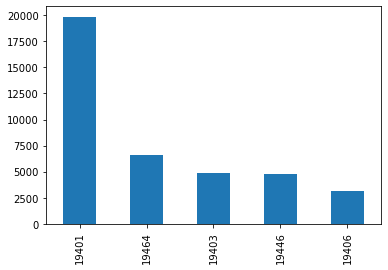

In [22]:
tp.plot(kind='bar')

In [23]:
tp1=cal.zip.value_counts()
tp1

19401    19834
19464     6643
19403     4854
19446     4748
19406     3174
         ...  
19119        1
77316        1
19457        1
19107        1
19127        1
Name: zip, Length: 104, dtype: int64

<AxesSubplot:xlabel='zip', ylabel='count'>

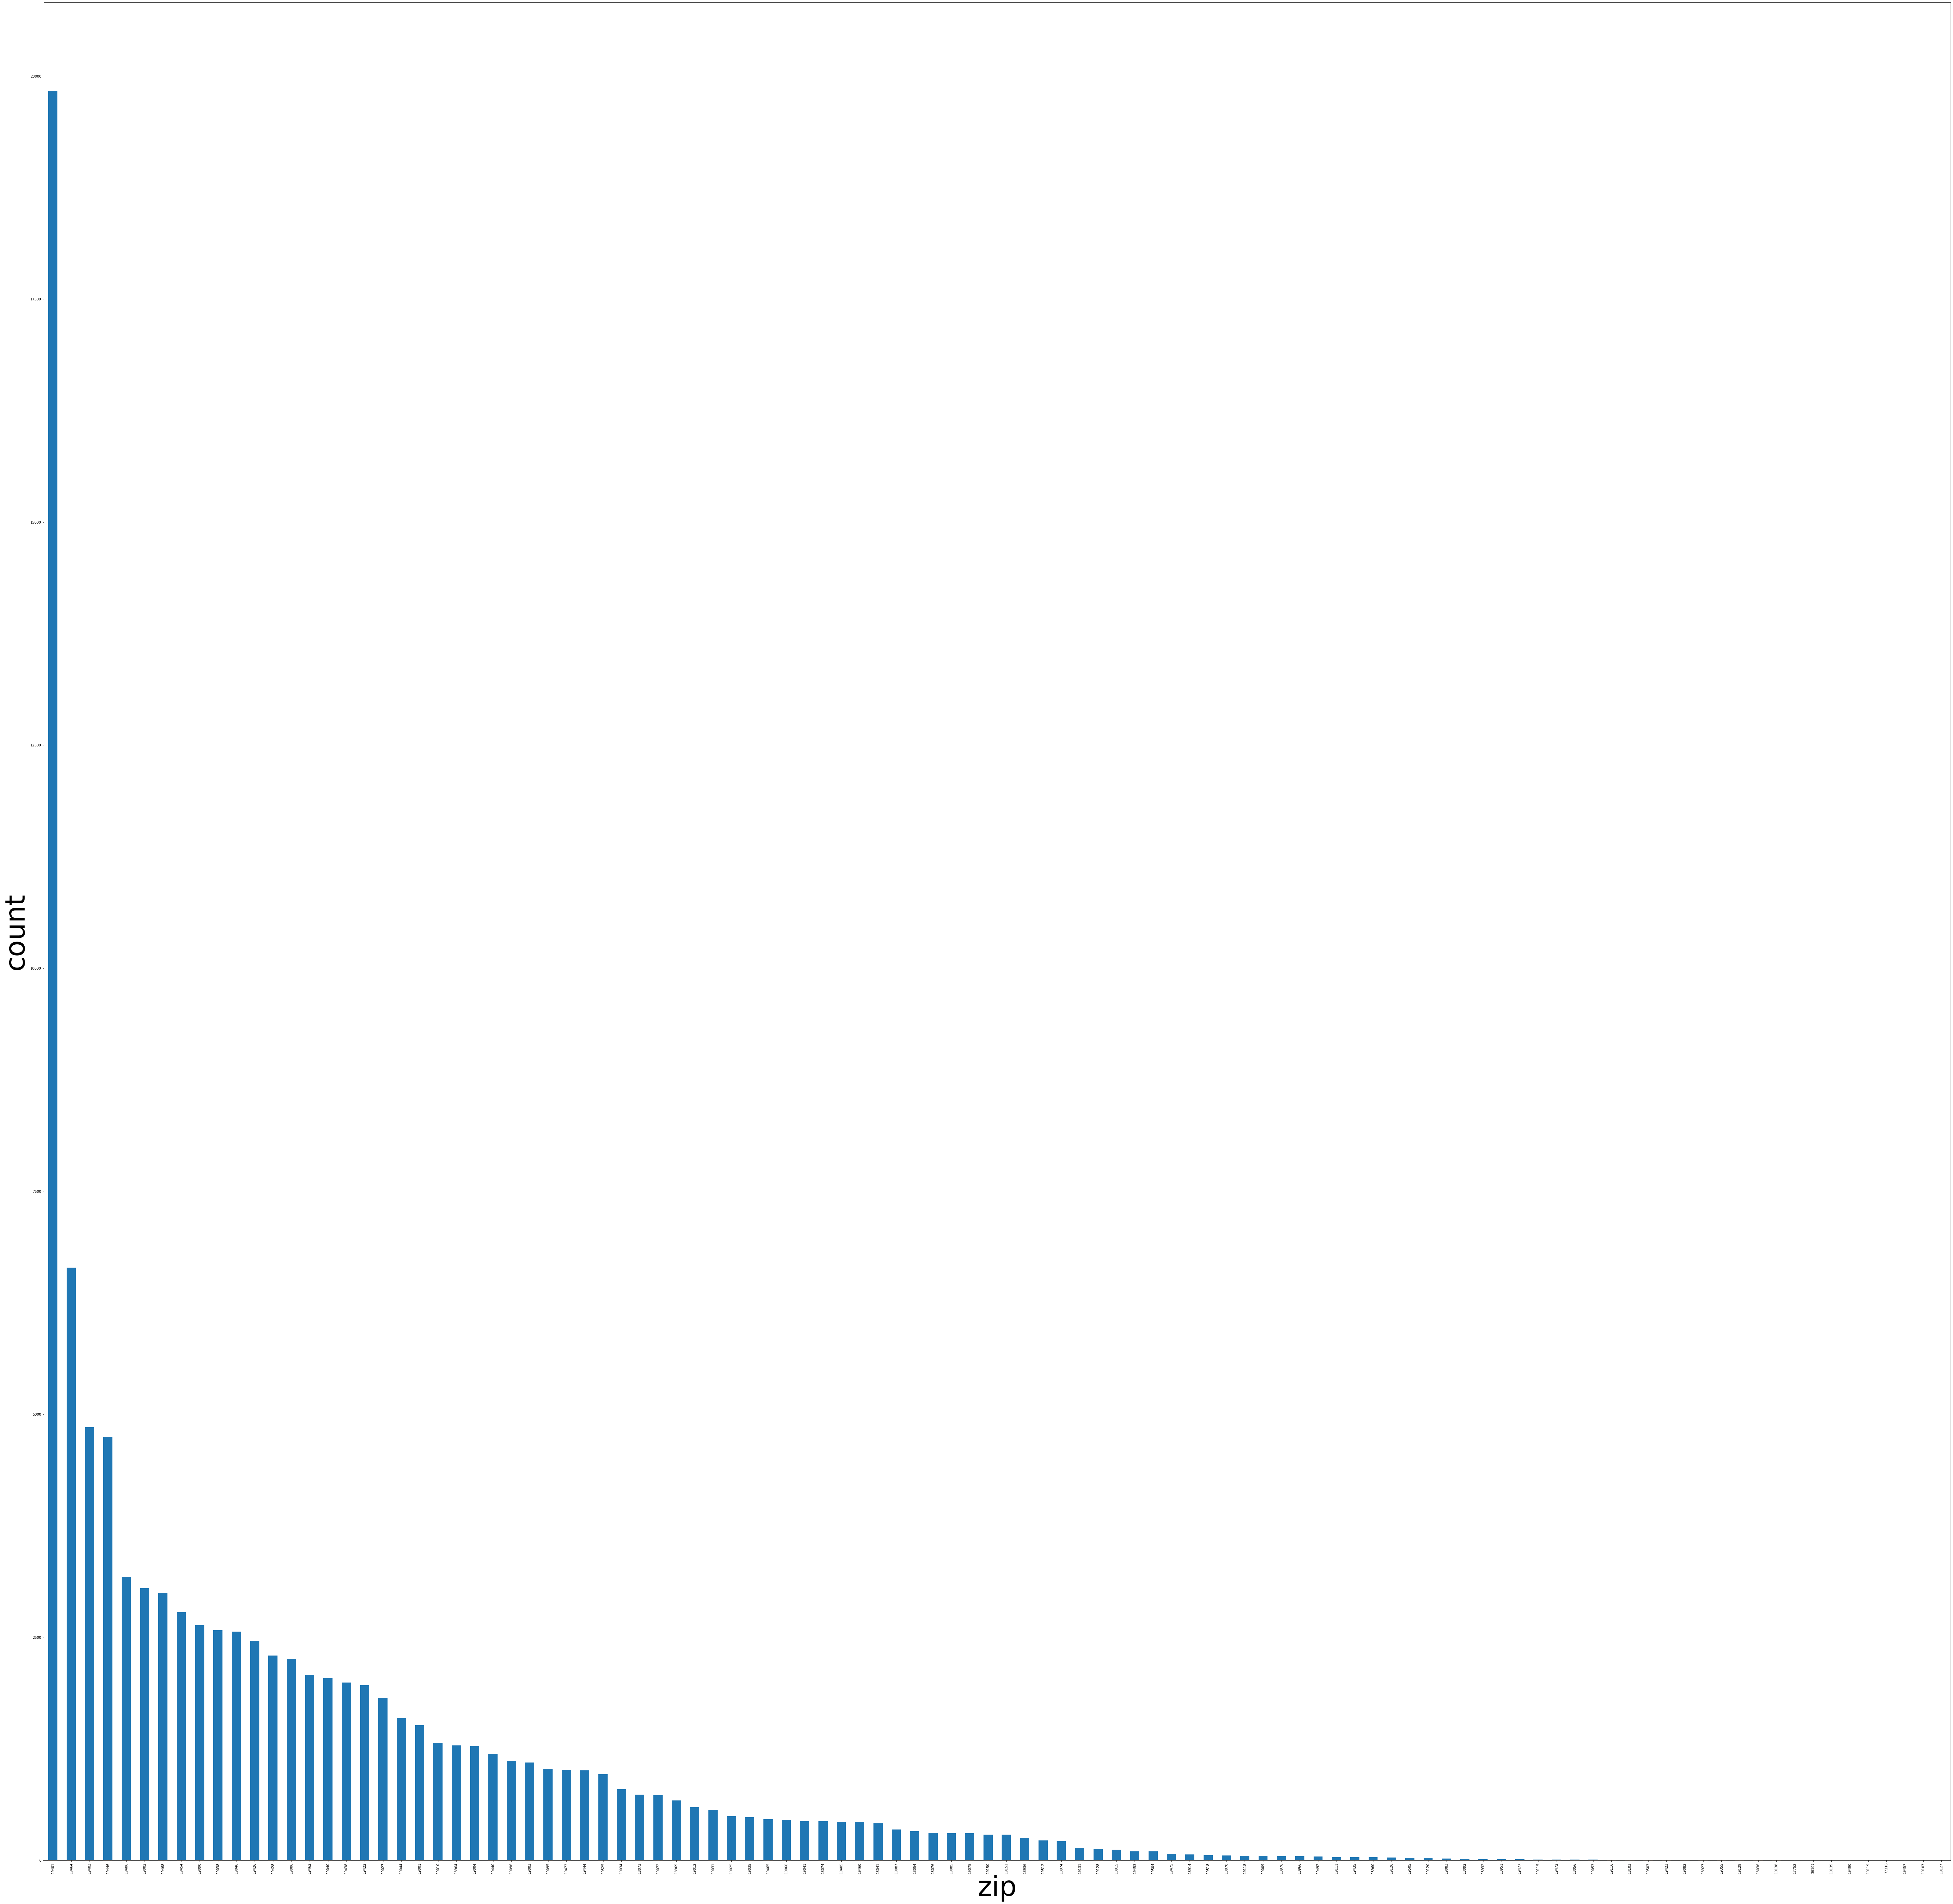

In [24]:
plt.figure(figsize=(100,100))
plt.xlabel('zip',fontsize=80)
plt.ylabel('count',fontsize=80)
tp1.plot(kind='bar')

# What are the top 5 townships(twp) COUNTS for 911 calls?**

In [25]:
cal.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [26]:
tp2 =cal.twp.value_counts().head()
tp2

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<AxesSubplot:>

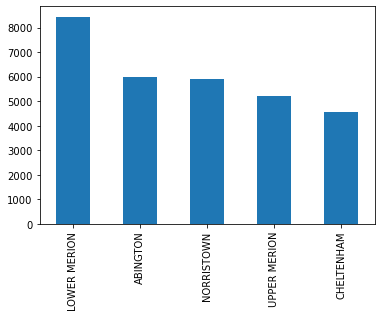

In [27]:
tp2.plot(kind='bar')

# How many unique title codes are there?

In [28]:
cal.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [29]:
cal.title.str.split(':')

0             [EMS,  BACK PAINS/INJURY]
1            [EMS,  DIABETIC EMERGENCY]
2                [Fire,  GAS-ODOR/LEAK]
3             [EMS,  CARDIAC EMERGENCY]
4                     [EMS,  DIZZINESS]
                      ...              
99487    [Traffic,  VEHICLE ACCIDENT -]
99488    [Traffic,  VEHICLE ACCIDENT -]
99489               [EMS,  FALL VICTIM]
99490           [EMS,  NAUSEA/VOMITING]
99491    [Traffic,  VEHICLE ACCIDENT -]
Name: title, Length: 99492, dtype: object

In [30]:
x=cal['title'][0]
x

'EMS: BACK PAINS/INJURY'

In [31]:
x.split(':')[0]

'EMS'

In [32]:
x1 = cal.title.apply(lambda x:x.split(':')[0])
x1

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [33]:
cal['Reason'] = x1

In [34]:
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [35]:
cal.Reason.unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

# What is the most common reason for a 911 call based off this new column?**

In [36]:
x2 = cal.Reason.value_counts()
x2

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:>

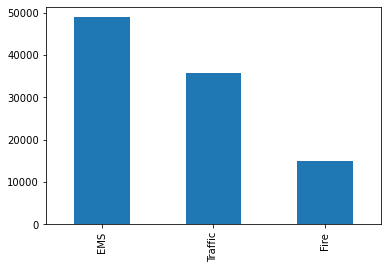

In [37]:
x2.plot(kind='bar')

<AxesSubplot:ylabel='Reason'>

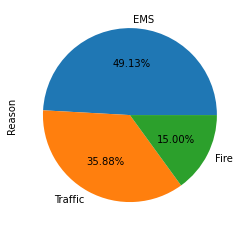

In [38]:
x2.plot(kind='pie',autopct='%.2f%%')

# Use seaborn to create a countplot of 911 calls by Reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

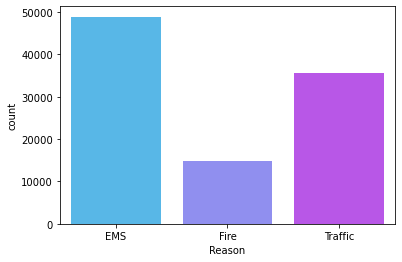

In [39]:
sns.countplot(x='Reason',data=cal,palette='cool')

# What is the data type of the objects in the timeStamp column?

In [40]:
cal.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


In [41]:
cal.timeStamp.dtypes

dtype('O')

In [42]:
cal.lat.dtypes

dtype('float64')

In [43]:
type(cal['timeStamp'].iloc[0])

str

In [44]:
type(cal.lat.iloc[0])

numpy.float64

# Convert timeStamp from strings to DateTime object**

In [45]:
cal.timeStamp

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [46]:
cal['timeStamp']=pd.to_datetime(cal['timeStamp'])

In [47]:
cal.timeStamp

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [48]:
t=cal['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:40:00')

In [64]:
cal['hour'] = cal['timeStamp'].apply(lambda t:t.hour)
cal['hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: hour, Length: 99492, dtype: int64

In [58]:
cal['year']=cal['timeStamp'].apply(lambda t:t.year)
cal['year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
99487    2016
99488    2016
99489    2016
99490    2016
99491    2016
Name: year, Length: 99492, dtype: int64

In [70]:
cal['year'].value_counts().sort_index()

2015     7969
2016    91523
Name: year, dtype: int64

In [57]:
cal['month']=cal['timeStamp'].apply(lambda t:t.month)
cal['month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: month, Length: 99492, dtype: int64

In [60]:
cal['month'].value_counts().sort_index()

1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: month, dtype: int64

In [109]:
t

Timestamp('2015-12-10 17:40:00')

In [114]:
cal['date'] =cal['timeStamp'].apply(lambda t:t.date())
cal['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

In [112]:
cal

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,month,year,hour,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,12,2015,17,Wednesday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,12,2015,17,Wednesday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,12,2015,17,Wednesday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,12,2015,17,Wednesday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10,12,2015,17,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,2016-08-24,8,2016,11,Tuesday
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,2016-08-24,8,2016,11,Tuesday
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,2016-08-24,8,2016,11,Tuesday
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,2016-08-24,8,2016,11,Tuesday


In [54]:
 cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [72]:
# Create day of week
t = pd.to_datetime(cal['timeStamp']).iloc[0]
type(t)

pandas._libs.tslibs.timestamps.Timestamp

In [73]:
cal['dayofweek'] = cal['timeStamp'].apply(lambda t:t.dayofweek)
cal['dayofweek']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: dayofweek, Length: 99492, dtype: int64

In [74]:
cal['dayofweek'].value_counts().sort_index()

0    14680
1    15150
2    14879
3    14478
4    14833
5    13336
6    12136
Name: dayofweek, dtype: int64

# Notice how the Day of Week is an integer 0-6. Use the .map() with a dictionary to map the actual string names to the day of the week

In [75]:
dmap = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
dmap

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

In [76]:
cal['dayofweek'] = cal['dayofweek'].map(dmap)
cal['dayofweek'] 

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
99487      Tuesday
99488      Tuesday
99489      Tuesday
99490      Tuesday
99491      Tuesday
Name: dayofweek, Length: 99492, dtype: object

In [78]:
w=cal['dayofweek'].value_counts()

In [81]:
w

Monday       15150
Tuesday      14879
Thursday     14833
Sunday       14680
Wednesday    14478
Friday       13336
Saturday     12136
Name: dayofweek, dtype: int64

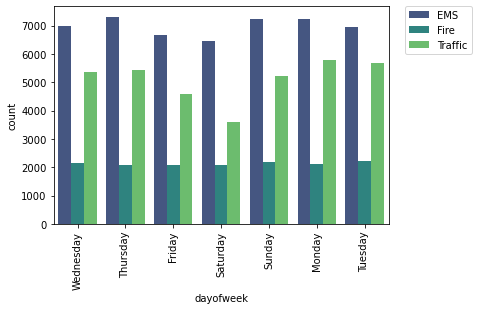

In [93]:
# Create count plot
sns.countplot(x = 'dayofweek', data = cal, hue = 'Reason',palette= 'viridis')

# Show edge lines
plt.rcParams["patch.force_edgecolor"] =True
plt.xticks(rotation=90)

# Relocate legend
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad= 0.)

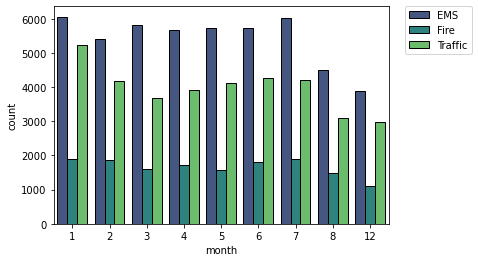

In [90]:
# Create count plot
sns.countplot(x = 'month', data = cal, hue = 'Reason', palette = 'viridis')

# Relocate legend
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

In [ ]:
#Explore Pivot tables

# Use seaborn to create a countplot of the Month column with the hue based off the Reason column

<AxesSubplot:xlabel='month', ylabel='count'>

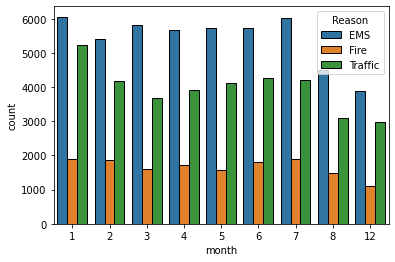

In [94]:
sns.countplot(x='month',data=cal,hue='Reason')

Do you notice something strange about this Plot? ** Plot is missing some months. May need to plot this information another way, possibly a simple line plot, that fills in the missing data.

Create a groupby object called byMonth that groups the DataFrame by month and uses the count() method for aggregation. 

In [96]:
cal.groupby('month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,year,hour,dayofweek
month,,,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


In [97]:
# Create group by object
byMonth = cal.groupby('month').count()

# View first few rows
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,year,hour,dayofweek
month,,,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


In [104]:
list(cal.groupby('month'))

[(1,
               lat        lng  \
  7969   40.121354 -75.363829   
  7970   40.140505 -75.310874   
  7971   40.246837 -75.681381   
  7972   40.097222 -75.376195   
  7973   40.148432 -75.219812   
  ...          ...        ...   
  21169  40.320966 -75.611349   
  21170  40.090675 -75.393304   
  21171  40.133037 -75.408463   
  21172  40.150896 -75.127438   
  21173  40.158570 -75.180287   
  
                                                      desc    zip  \
  7969   ROSEMONT AVE & W WASHINGTON ST;  NORRISTOWN; S...  19401   
  7970   GERMANTOWN PIKE & HANNAH AVE;  EAST NORRITON; ...  19401   
  7971   VINE ST & CENTER ST;  WEST POTTSGROVE; Station...  19464   
  7972   MARK LN & DEAD END;  UPPER MERION; Station 317...  19401   
  7973   BANNOCKBURN AVE & S SPRING GARDEN ST;  AMBLER;...  19002   
  ...                                                  ...    ...   
  21169  PHILADELPHIA AVE & WILSON AVE; DOUGLASS; 2016-...  19525   
  21170  RAMP I76 WB TO RT202  & RAMP I76 WB

In [105]:
cal.groupby('month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,year,hour,dayofweek
month,,,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


# Create a simple plot off of the dataframe indicating the count of calls per month

1


<AxesSubplot:xlabel='month'>

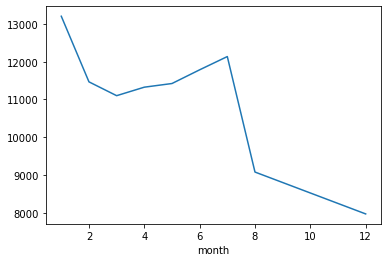

In [98]:
byMonth['lat'].plot()

<AxesSubplot:xlabel='month'>

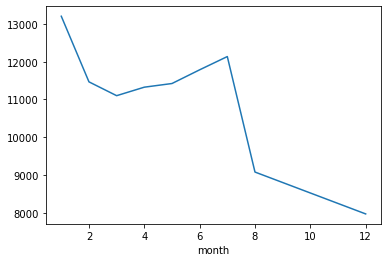

In [100]:
byMonth['lng'].plot()

In [102]:
bm=byMonth.reset_index()
bm

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,year,hour,dayofweek
0,1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
5,6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
6,7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
7,8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
8,12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


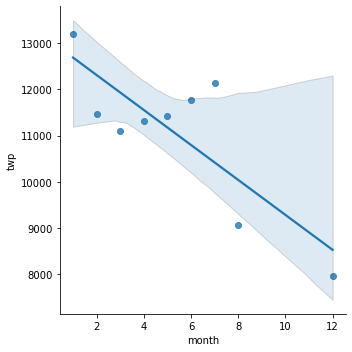

In [107]:
# Create linear model
sns.lmplot(x = 'month', y = 'twp', data = byMonth.reset_index()) 
# there was no 'Month' column in byMonth, need to reset the index for this code to work

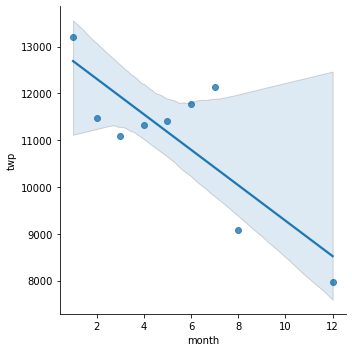

In [117]:
sns.lmplot(x='month',y='twp',data=bm)

#### Use apply along with the .date() method to create a new column called 'Date' that contains the date from the timeStamp column

In [118]:
t

Timestamp('2015-12-10 17:40:00')

In [120]:
cal['date']=cal['timeStamp'].apply(lambda t:t.date())
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,month,year,hour,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,12,2015,17,Wednesday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,12,2015,17,Wednesday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,12,2015,17,Wednesday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,12,2015,17,Wednesday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10,12,2015,17,Wednesday


# Grouby the Date column with the count() aggregate and create a plot of counts of 911 calls

In [ ]:
'''plt.figure(figsize=(12,8))
df.groupby('Date').count()['lat'].plot()
plt.xticks(rotation='vertical')
plt.tight_layout
plt.savefig('graph_1.png',dpi=400)'''

In [124]:
plt.figure(figsize=(12,8))
cal.groupby('date').count().head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,month,year,hour,dayofweek
date,,,,,,,,,,,,,,
2015-12-10,115,115,115,115,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,396,396,396,395,391,396,396,396,396,396,396


<Figure size 864x576 with 0 Axes>

In [125]:
cal.groupby('date').count()['lat']

date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

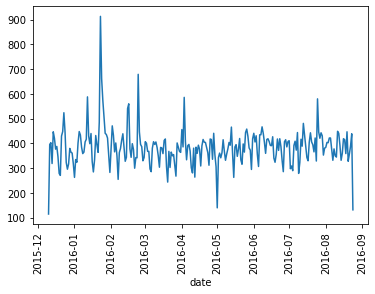

In [128]:

cal.groupby('date').count()['lat'].plot()
plt.xticks(rotation=90)
plt.show()

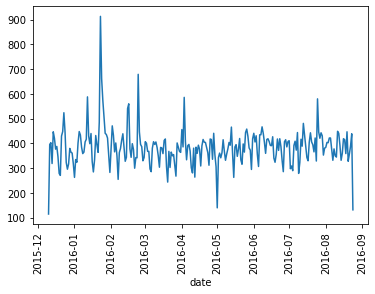

<Figure size 432x288 with 0 Axes>

In [131]:
cal.groupby('date').count()['lat'].plot()
plt.xticks(rotation=90)
plt.show()
plt.tight_layout
plt.savefig('graph_1.png',dpi=400)

In [132]:
cal.date.unique()

array([datetime.date(2015, 12, 10), datetime.date(2015, 12, 11),
       datetime.date(2015, 12, 12), datetime.date(2015, 12, 13),
       datetime.date(2015, 12, 14), datetime.date(2015, 12, 15),
       datetime.date(2015, 12, 16), datetime.date(2015, 12, 17),
       datetime.date(2015, 12, 18), datetime.date(2015, 12, 19),
       datetime.date(2015, 12, 20), datetime.date(2015, 12, 21),
       datetime.date(2015, 12, 22), datetime.date(2015, 12, 23),
       datetime.date(2015, 12, 24), datetime.date(2015, 12, 25),
       datetime.date(2015, 12, 26), datetime.date(2015, 12, 27),
       datetime.date(2015, 12, 28), datetime.date(2015, 12, 29),
       datetime.date(2015, 12, 30), datetime.date(2015, 12, 31),
       datetime.date(2016, 1, 1), datetime.date(2016, 1, 2),
       datetime.date(2016, 1, 3), datetime.date(2016, 1, 4),
       datetime.date(2016, 1, 5), datetime.date(2016, 1, 6),
       datetime.date(2016, 1, 7), datetime.date(2016, 1, 8),
       datetime.date(2016, 1, 9), datetim

In [133]:
cal.date.nunique()

259

In [135]:
cal.date.value_counts().head()

2016-01-23    913
2016-02-24    679
2016-01-24    662
2016-01-12    588
2016-04-03    586
Name: date, dtype: int64

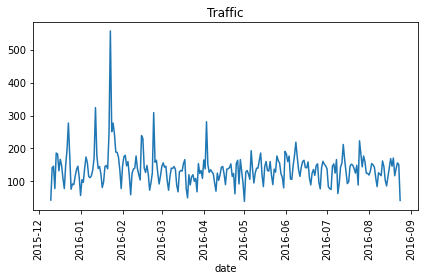

In [138]:
cal[cal['Reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

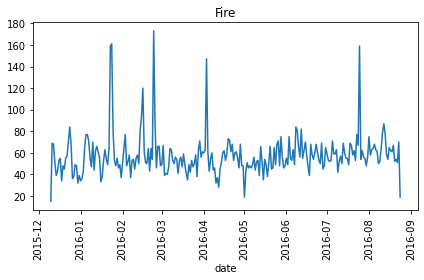

In [141]:
cal[cal['Reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.xticks(rotation='vertical')
plt.tight_layout()

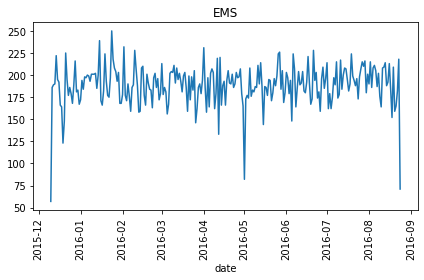

In [143]:
cal[cal['Reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.xticks(rotation='vertical')
plt.tight_layout()

# Heat Maps
## By Day of Week

In [146]:
list(cal.groupby(['dayofweek','hour']))

[(('Friday', 0),
               lat        lng  \
  511    40.235373 -75.224751   
  512    40.011767 -75.294673   
  513    40.124147 -75.060930   
  514    40.251370 -75.465710   
  515    40.260460 -75.455376   
  ...          ...        ...   
  97853  40.006811 -75.292933   
  97854  40.145127 -75.132477   
  97855  40.241171 -75.615558   
  97856  40.073779 -75.297206   
  97857  40.124775 -75.293188   
  
                                                      desc    zip  \
  511    STUMP RD & HORSHAM RD;  MONTGOMERY; Station 34...  19454   
  512    MONTGOMERY AVE & WOODSIDE RD;  LOWER MERION; S...  19041   
  513    RED LION RD & MURRAY AVE;  LOWER MORELAND; Sta...  19006   
  514    PERKIOMEN AVE & 3RD ST; SCHWENKSVILLE; 2015-12...  19473   
  515    PARK AVE & PENNYPACKER RD; PERKIOMEN; 2015-12-...  19473   
  ...                                                  ...    ...   
  97853  CRICKET AVE & E ATHENS AVE; LOWER MERION; 2016...  19003   
  97854  FITZWATERTOWN RD & WIND

In [147]:
cal.groupby(['dayofweek','hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reason  \
dayofweek hour                                                                  
Friday    0     375  375   375  375    375        375  373   371  375     375   
          1     301  301   301  301    301        301  301   300  301     301   
          2     263  263   263  263    263        263  263   262  263     263   
          3     260  260   260  260    260        260  260   258  260     260   
          4     224  224   224  224    224        224  224   224  224     224   
...             ...  ...   ...  ...    ...        ...  ...   ...  ...     ...   
Wednesday 19    698  698   698  698    698        698  698   694  698     698   
          20    617  617   617  617    617        617  617   614  617     617   
          21    553  553   553  553    553        553  553   550  553     553   
          22    424  424   424  424    424        424  424   424  424     424   
          23    354  354   354  354    354        354  354   354  354     354   

                date  month  year  
dayofweek hour                     
Friday    0      375    375   375  
          1      301    301   301  
          2      263    263   263  
          3      260    260   260  
          4      224    224   224  
...              ...    ...   ...  
Wednesday 19     698    698   698  
          20     617    617   617  
          21     553    553   553  
          22     424    424   424  
          23     354    354   354  

[168 rows x 13 columns]

In [148]:
cal.groupby(['dayofweek','hour']).count()['Reason']

dayofweek  hour
Friday     0       375
           1       301
           2       263
           3       260
           4       224
                  ... 
Wednesday  19      698
           20      617
           21      553
           22      424
           23      354
Name: Reason, Length: 168, dtype: int64

In [151]:
dayhour=cal.groupby(['dayofweek','hour']).count()['Reason'].unstack()
dayhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Friday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Monday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Saturday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Sunday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Thursday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Tuesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Wednesday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

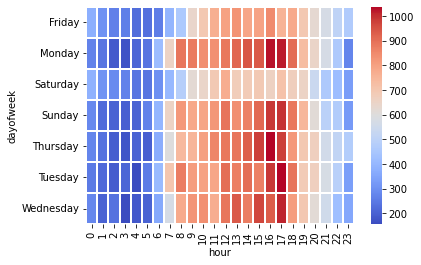

In [159]:
sns.heatmap(dayhour,cmap = 'coolwarm',linewidths=2)

# Create Clustermap using this DataFrame**

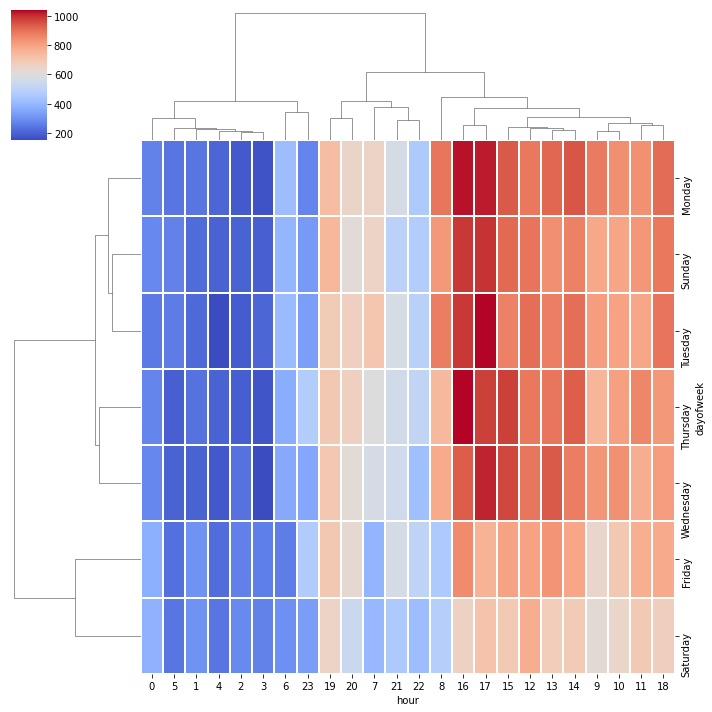

In [158]:
sns.clustermap(dayhour,cmap = 'coolwarm',linewidths =2)

In [161]:
d=sns.load_dataset('diamonds')
d

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [162]:
d.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [164]:
d.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

<AxesSubplot:xlabel='cut', ylabel='count'>

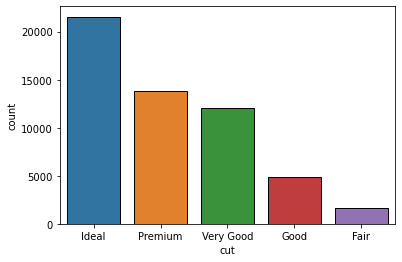

In [165]:
sns.countplot(x='cut',data=d)

Text(0, 0.5, 'COLUMNS')

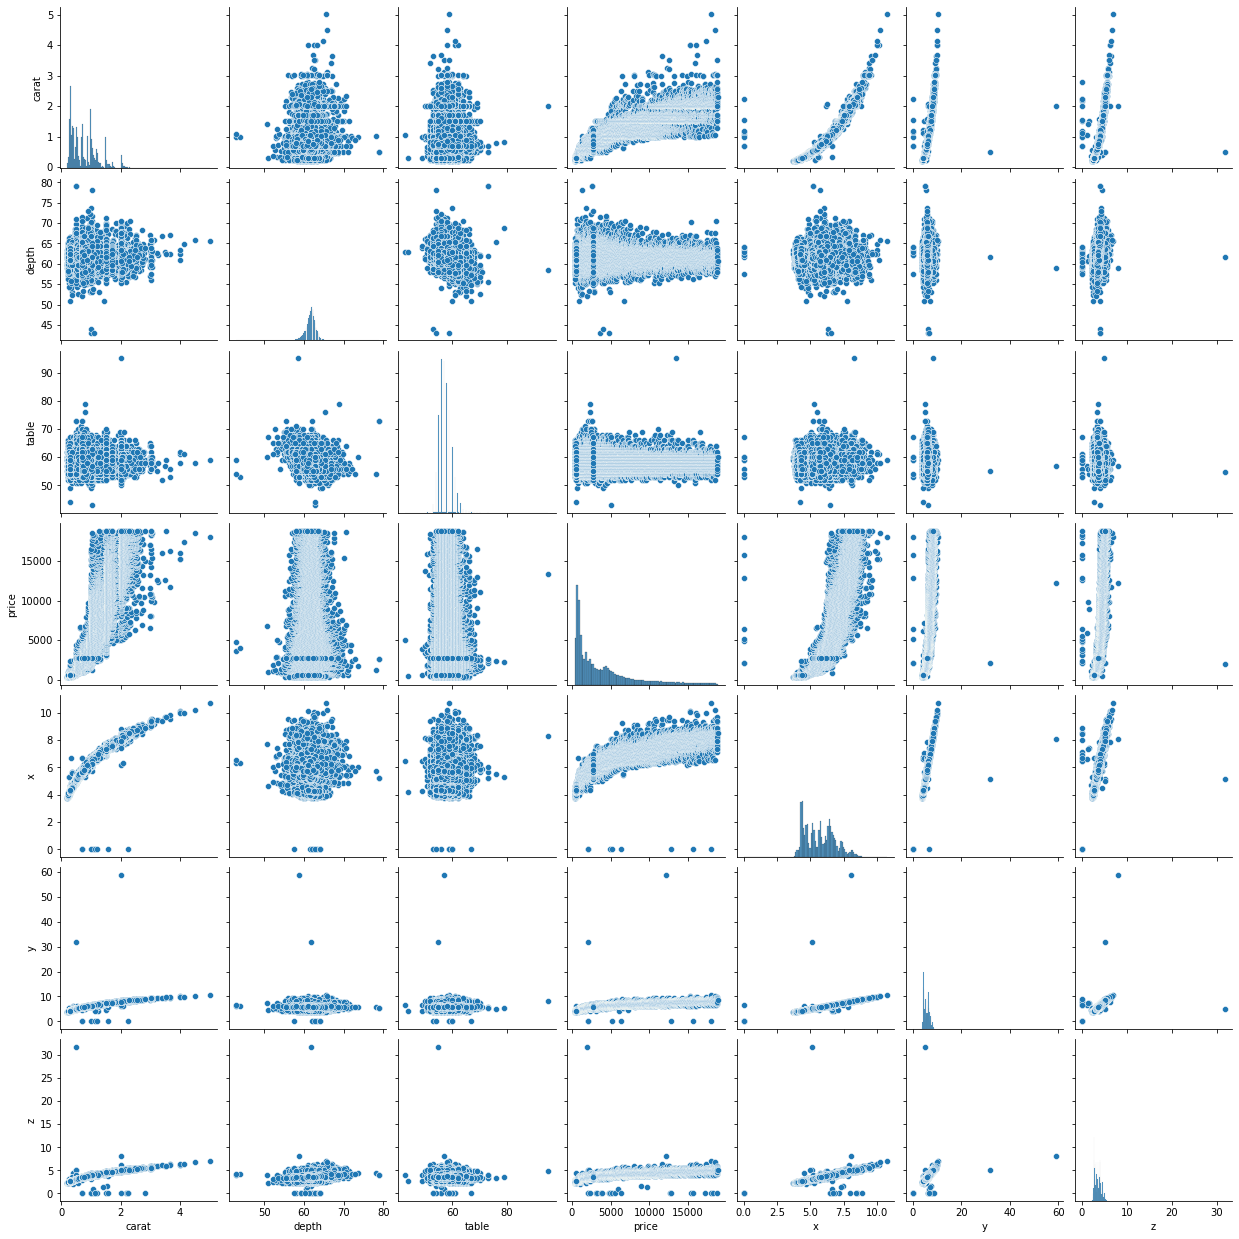

In [167]:
sns.pairplot(data=d)
plt.xlabel('ROWS',fontsize=13)
plt.ylabel('COLUMNS',fontsize=13)

In [170]:
d.columns.nunique()

10

In [171]:
d.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


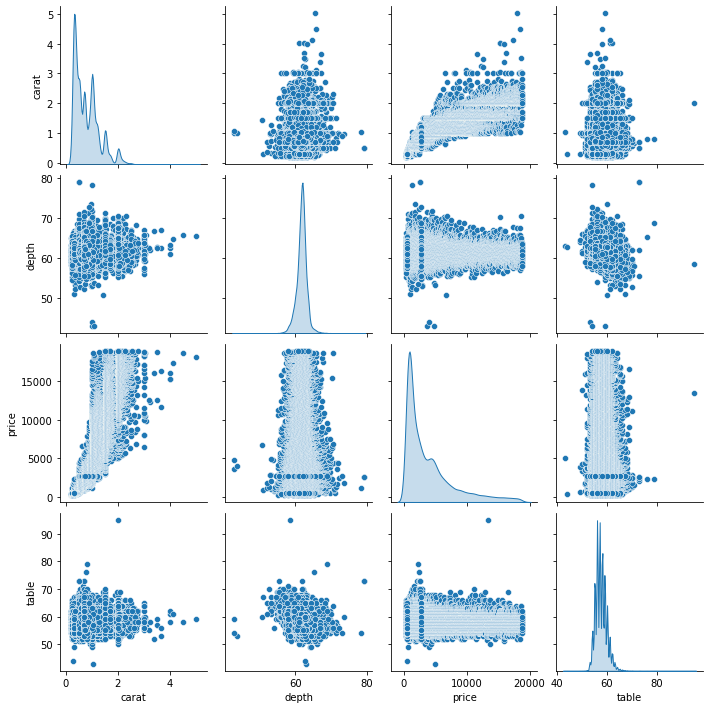

In [172]:
sns.pairplot(d[['carat','depth','price','table']],diag_kind='kde')